# Power law fix

In this notebook, I make a fitting of data from 'data/datos.cvs' file, trying to fit the data to the best curve, as it is shown in the solid lines.

You can see the data in the histograms and, at the end, the comparision between the power law fitting and the data itself is compared by the residual plot, showing below the last plot.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
from scipy import stats
from scipy.stats import chisquare, chi2, powerlaw
from scipy.optimize import curve_fit, minimize
import math as m
import csv

In [ ]:
# Lectura de datos
data = pd.read_csv("datos.csv", header=None)
data.columns = ['Mediciones']

datos = data['Mediciones'].to_numpy() # Conertir en un vector los datos de la columna de Mediciones
print(datos)

[0.17066018 0.25885377 0.26321196 ... 0.99987071 0.99987419 0.99987803]


In [ ]:
nbins = 55
#nbins = round(m.sqrt(len(datos)))
#print("Número de bins recomendados (regla de la raíz cuadrada de n): ", nbins)

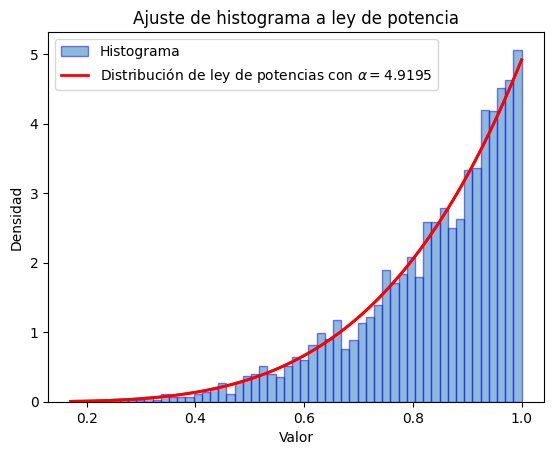

[0.02210919 0.         0.         0.         0.         0.02210919
 0.02210919 0.02210919 0.02210919 0.06632756 0.02210919 0.11054594
 0.06632756 0.06632756 0.06632756 0.11054594 0.13265513 0.19898269
 0.26531026 0.11054594 0.28741944 0.3758562  0.39796538 0.50851132
 0.39796538 0.35374701 0.50851132 0.64116645 0.59694808 0.81803996
 0.99491346 0.90647671 1.17178696 0.75171239 0.88436752 1.12756859
 1.21600534 1.39287884 1.90139017 1.70240748 1.8350626  2.07826367
 1.79084423 2.586775   2.586775   2.78575769 2.49833824 2.63099337
 3.33848739 3.36059658 4.20074572 4.17863653 4.51027435 4.62082029
 5.06300405]
[0.17066018 0.18573687 0.20081356 0.21589024 0.23096693 0.24604362
 0.26112031 0.276197   0.29127369 0.30635037 0.32142706 0.33650375
 0.35158044 0.36665713 0.38173381 0.3968105  0.41188719 0.42696388
 0.44204057 0.45711726 0.47219394 0.48727063 0.50234732 0.51742401
 0.5325007  0.54757738 0.56265407 0.57773076 0.59280745 0.60788414
 0.62296083 0.63803751 0.6531142  0.66819089 0.68

In [ ]:
# Genera datos de ejemplo con una distribución de ley de potencia

# Crea el histograma de los datos
n, bins, _ = plt.hist(datos, bins=nbins, density=True, alpha=0.5, edgecolor='b' ,label='Histograma')


# Ajusta la función de distribución de ley de potencia al histograma
alpha, _, _ = stats.powerlaw.fit(datos)

# Calcula la función de distribución de ley de potencia
x = np.linspace(min(datos), max(datos), 100)
pdf = stats.powerlaw.pdf(x, alpha)

# Distribución ajustada
plt.plot(x, pdf, 'r-', lw=2, label=r'Distribución de ley de potencias con $\alpha = {}$'.format(round(alpha,4)))


# Grafica el histograma y la función de distribución ajustada
plt.plot(x, pdf, 'r', lw=2)
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.title('Ajuste de histograma a ley de potencia')
plt.legend()
plt.show()
print(n)
print(bins)

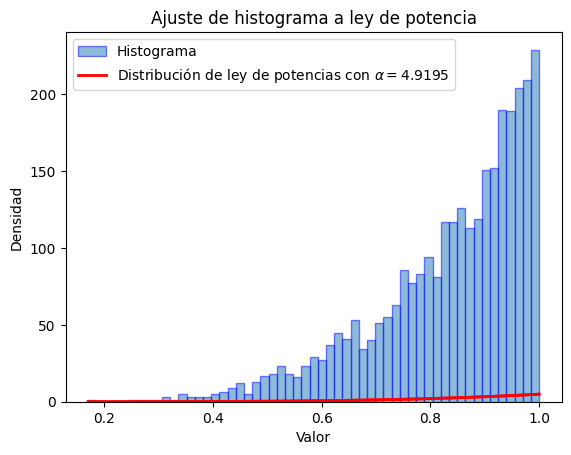

In [ ]:
# Genera datos de ejemplo con una distribución de ley de potencia

# Crea el histograma de los datos
nn, bbins, _ = plt.hist(datos, bins=nbins, density=False, alpha=0.5, edgecolor='b' ,label='Histograma')


# Ajusta la función de distribución de ley de potencia al histograma
alpha, _, _ = stats.powerlaw.fit(datos)

# Calcula la función de distribución de ley de potencia
x = np.linspace(min(datos), max(datos), 100)
pdf = stats.powerlaw.pdf(x, alpha)

# Distribución ajustada
plt.plot(x, pdf, 'r-', lw=2, label=r'Distribución de ley de potencias con $\alpha = {}$'.format(round(alpha,4)))


# Grafica el histograma y la función de distribución ajustada
plt.plot(x, pdf, 'r', lw=2)
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.title('Ajuste de histograma a ley de potencia')
plt.legend()
plt.show()

In [ ]:
# parámetro de normalización

norm = max(nn)/max(n)

print(norm)

45.23006454545453


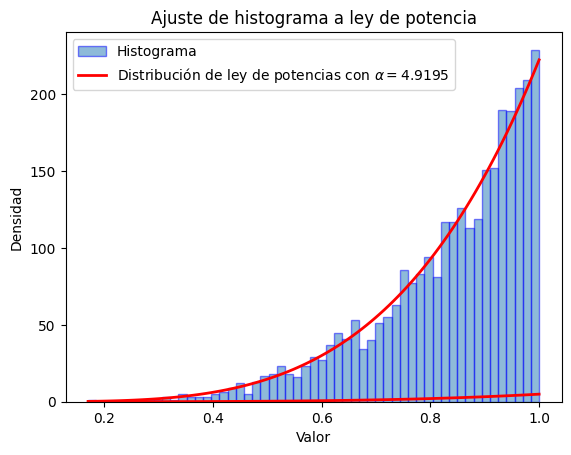

In [ ]:
# Genera datos de ejemplo con una distribución de ley de potencia

# Crea el histograma de los datos
nn, bbins, _ = plt.hist(datos, bins=nbins, density=False, alpha=0.5, edgecolor='b' ,label='Histograma')


# Ajusta la función de distribución de ley de potencia al histograma
alpha, _, _ = stats.powerlaw.fit(datos)

# Calcula la función de distribución de ley de potencia
x = np.linspace(min(datos), max(datos), 100)
pdf = stats.powerlaw.pdf(x, alpha)

# Distribución ajustada
plt.plot(x, pdf*norm, 'r-', lw=2, label=r'Distribución de ley de potencias con $\alpha = {}$'.format(round(alpha,4)))


# Grafica el histograma y la función de distribución ajustada
plt.plot(x, pdf, 'r', lw=2)
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.title('Ajuste de histograma a ley de potencia')
plt.legend()
plt.show()

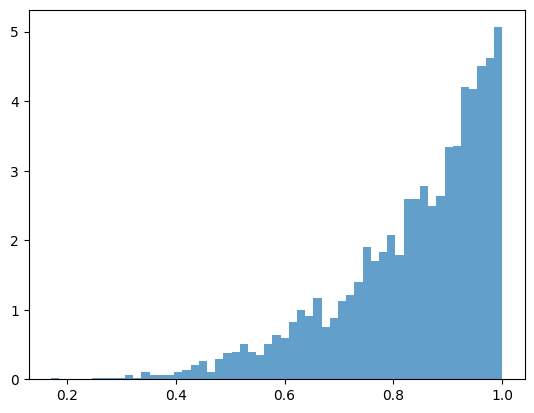

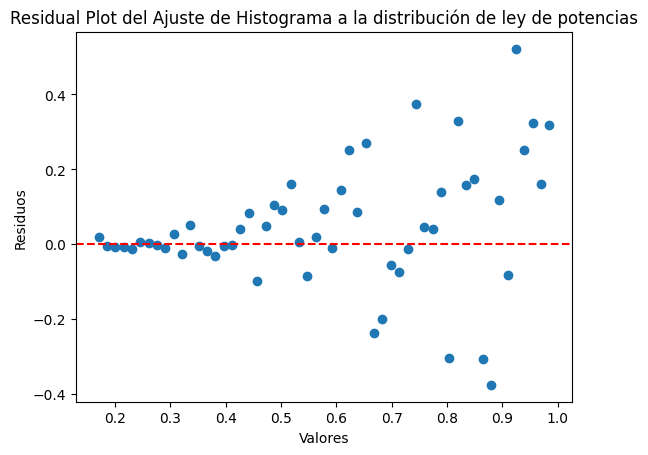

In [ ]:
# Plot hist + residuals individuales

# Crear histograma
n, bins, _ = plt.hist(datos, bins=nbins, density=True, alpha=0.7, label='Histograma')

# Ajustar distribución Beta
params = powerlaw.fit(datos)
x = np.linspace(0, 1, 100)
y = stats.powerlaw.pdf(x, *params)

# Calcular residuos
hist_residuos = n - stats.powerlaw.pdf(bins[:-1], *params)

# Graficar residuos
plt.figure()
plt.scatter(bins[:-1], hist_residuos)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores')
plt.ylabel('Residuos')
plt.title('Residual Plot del Ajuste de Histograma a la distribución de ley de potencias')

plt.show()

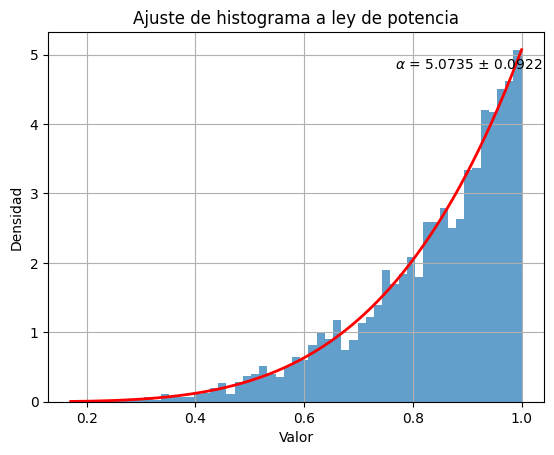

In [ ]:
# Crea el histograma de los datos
n, bins, _ = plt.hist(datos, bins=nbins, density=True, alpha=0.7)

# Ajusta la función de distribución de ley de potencia al histograma
alpha2, _, _ = stats.powerlaw.fit(datos, floc=0)

# Realiza el ajuste bootstrap para estimar la incertidumbre en alpha
n_bootstrap = 10000  # Número de repeticiones bootstrap
alpha_bootstrap = np.zeros(n_bootstrap)

for i in range(n_bootstrap):
    bootstrap_sample = np.random.choice(datos, size=len(datos), replace=True)
    alpha_bootstrap[i], _, _ = stats.powerlaw.fit(bootstrap_sample, floc=0)

# Calcula la incertidumbre en alpha como el desvío estándar de los valores bootstrap
alpha_std = np.std(alpha_bootstrap)

# Calcula la función de distribución de ley de potencia
x2 = np.linspace(min(datos), max(datos), 1000)
pdf = stats.powerlaw.pdf(x2, alpha2)

# Grafica el histograma, la función de distribución ajustada y la incertidumbre en alpha
plt.plot(x2, pdf, 'r', lw=2)
plt.xlabel('Valor')
plt.ylabel('Densidad')
plt.title('Ajuste de histograma a ley de potencia')
plt.grid(True)

# Muestra la incertidumbre en alpha como un rango de +/- 1 desvío estándar
plt.text(0.7, 0.9, r'$\alpha$ = {} $\pm$ {}'.format(round(alpha2,4), round(alpha_std,4)),
         transform=plt.gca().transAxes)

plt.show()

In [ ]:
# Obtener la Chi-Cuadrada

y_esperados = stats.powerlaw.pdf(bins[:-1], *params)
chi2_val = np.sum((n - y_esperados)**2 / y_esperados) # Calcular la chi-cuadrada de Pearson
print(chi2_val*norm)

58.34852630430576


In [ ]:
# Obtener el valor de p
p_value = 1-stats.chi2.cdf(chi2_val*norm, 53)

print("", p_value)

 0.28526690199425186


In [ ]:
# Resumen de parámetros involucrados truncados a dos sifras significativas (con exepción de la media)

N = len(datos) # Número de datos
media = round(datos.mean(), 4) # Media de datos
inc_media = round(datos.std()/m.sqrt(len(datos)), 4) # Incertidumbre en la media de datos
sigma = round(datos.std(),4) # desviación estpandar de datos
nnbins = nbins # Número de bins
alpha = round(params[0], 4) # Alfa del ajuste
inc_alpha = round(alpha_std,4) # Incertidumbre en alfa
g_libertad = nnbins- 2 # Grados de libertad = bins - número de parámetros
chi_2 = round(chi2_val*norm/g_libertad, 4) # Chi-cuadrada normalizada
p = round(p_value, 4)

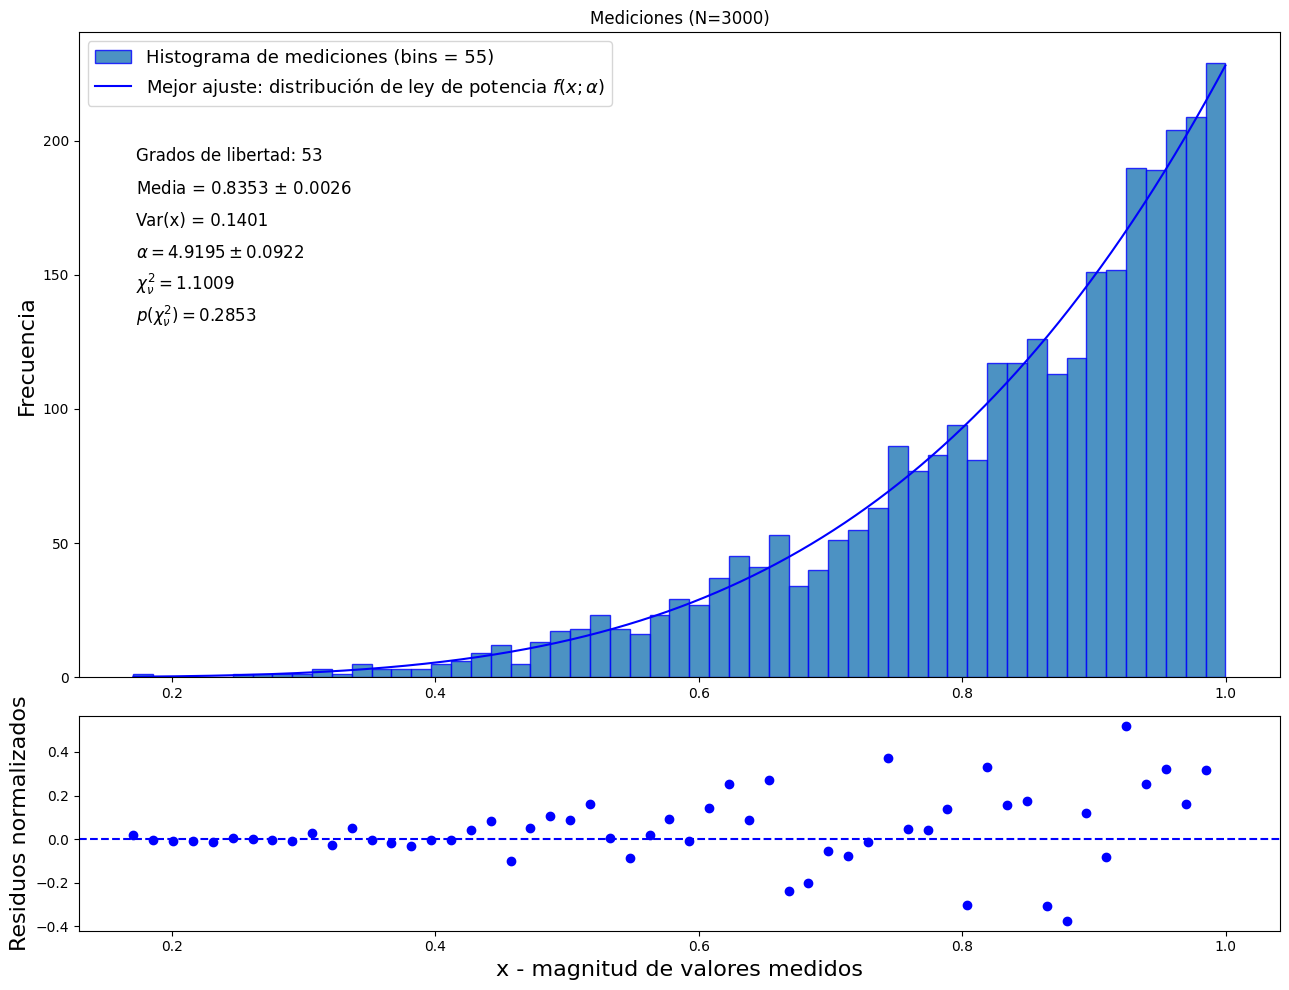

In [ ]:
# Crear figura y especificar diseño de grilla
fig = plt.figure(figsize=(13, 10))
gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1])  # 2 filas: histograma y residuos

# Crear eje para histograma
ax_hist = plt.subplot(gs[0])
n, bins, _ = ax_hist.hist(datos, bins=nnbins, density=False, edgecolor='b' ,alpha=0.8, label=f'Histograma de mediciones (bins = {nnbins})')

# Formatear las etiquetas del eje vertical con dos cifras significativas
#plt.yticks(np.round(np.linspace(0, 5, num=5), decimals=1))

# Agregar una fórmula LaTeX en el plot
box1 = f"Grados de libertad: {g_libertad}"
box2 = r"Media = {} $\pm$ {}".format(media, inc_media)
box3 = f"Var(x) = {sigma}"
box4 = r"$\alpha = {} \pm {}$".format(alpha, inc_alpha)
box5 =  r'$\chi^2_\nu = {}$'.format(chi_2)
box6 = r"$p(\chi^2_\nu) = {}$".format(p)


#Ubicación en el primer plot
plt.text(0.048, 0.8, box1, color='black',fontsize=12, transform=plt.gca().transAxes)
plt.text(0.048, 0.75, box2, color='black',fontsize=12, transform=plt.gca().transAxes)
plt.text(0.048, 0.70, box3, color='black',fontsize=12, transform=plt.gca().transAxes)
plt.text(0.048, 0.65, box4, color='black',fontsize=12, transform=plt.gca().transAxes)
plt.text(0.048, 0.60, box5, color='black',fontsize=12, transform=plt.gca().transAxes)
plt.text(0.048, 0.55, box6, color='black',fontsize=12, transform=plt.gca().transAxes)

# Ajustar distribución gamma
params = stats.powerlaw.fit(datos)
x = np.linspace(min(datos), max(datos), 3000)
y = stats.powerlaw.pdf(x, *params)

# Graficar ajuste de distribución de potencias
ax_hist.plot(x, y*norm, 'b-', label=r"Mejor ajuste: distribución de ley de potencia $f(x; \alpha)$")

# Calcular residuos normalizados
residuos =  (nn - stats.powerlaw.pdf(bins[:-1], *params)*norm)/norm

# Crear eje para residuos
ax_residuos = plt.subplot(gs[1], sharex=ax_hist)
ax_residuos.scatter(bins[:-1], residuos, color='b')
ax_residuos.axhline(y=0, color='b', linestyle='--')

# Configurar ejes y leyendas
ax_hist.set_ylabel('Frecuencia', fontsize="16")
ax_hist.set_title(f'Mediciones (N={len(datos)})')
ax_hist.legend(fontsize="13")

ax_residuos.set_ylabel('Residuos normalizados', fontsize="16")
ax_residuos.set_xlabel('x - magnitud de valores medidos', fontsize="16")


plt.tight_layout()  # Ajustar espacio entre subgráficos
plt.savefig('grafica.pdf', format='pdf') # Guardar la figura en formato PDF
plt.show()